# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

### Exercise 11.1 - linear fit

We first practice regression on a simple linear function:

$$ y = 2 x + 1$$

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

This first practice session tries to determine the most influential aspects using a single neuron. I tried different combinations of $N_{train}$, $N_{epochs}$ and $\sigma$ to determine how they must change together to mantain a high accuracy. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from keras import backend, activations

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' #additional flag to keep kernel from crashing

# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

Using TensorFlow backend.


In [6]:
# generate training inputs
N_train = 100 # parameters changed to check variations 
sigma = 1.0 # noise standard deviation
epoch = 100

np.random.seed(0)
x_predicted = np.random.uniform(-1, 1, 100)

x_train = np.random.uniform(-1, 1, N_train)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

epoch_ = np.arange(1,epoch+1)

We define here the single neuron to train to recognise linearly distributed data points. I changed time after time the parameters, which are then saved and stored in external files. The number of validation points remains constant, as the batchsize, the number of data points the neuron is exposed at a time.

In [7]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(x=x_train, y=y_train, 
                    batch_size=32, epochs=epoch,
                    shuffle=True, # a good idea is to shuffle input before at each epoch
                    validation_data=(x_valid, y_valid),
                    verbose = 0)

In [9]:
filename = "lin_fit/"+str(N_train)+"_"+str(sigma)+".txt"
y_predicted = model.predict(x_predicted)                    # saves to file predicted values on same sample

y_predicted = np.array(y_predicted)
y_predicted = y_predicted.flatten()

In [10]:
with open(filename, 'w') as fh:
    fh.writelines(map("{}\t{}\t{}\n".format, epoch_, history.history['loss'],y_predicted))
# I know it's cheating, but the size of the predicted data is taken 
# exactly the same as the number of epochs to use a single datafile…

score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
with open("lin_fit/score_compare.txt",'a') as f:
    f.write(str(N_train)+'\t'+ str(sigma)+'\t'+str(score[0])+'\t'+str(score[1])+'\n')

50/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [7]:
# checks progressive status of fit (alternative to other checks…)
model_1 = tf.keras.Sequential()
model_1.add(Dense(1, input_shape=(1,)))
model_1.compile(optimizer='sgd', loss='mse', metrics=['mse'])
for i in range (5):
    filename = "lin_fit/"+str(N_train)+"_"+str(sigma)+"_"+str(i+1)+".txt"

    history = model_1.fit(x=x_train, y=y_train, 
                        batch_size=32, epochs=10,
                        shuffle=True, # a good idea is to shuffle input before at each epoch
                        validation_data=(x_valid, y_valid),
                        verbose = 0)
    y_predicted = model_1.predict(x_predicted)                    # saves to file predicted values on same sample

    y_predicted = np.array(y_predicted)
    y_predicted = y_predicted.flatten()
    
    with open(filename, 'w') as fh:
        fh.writelines("%s\n" % y_val for y_val in y_predicted)

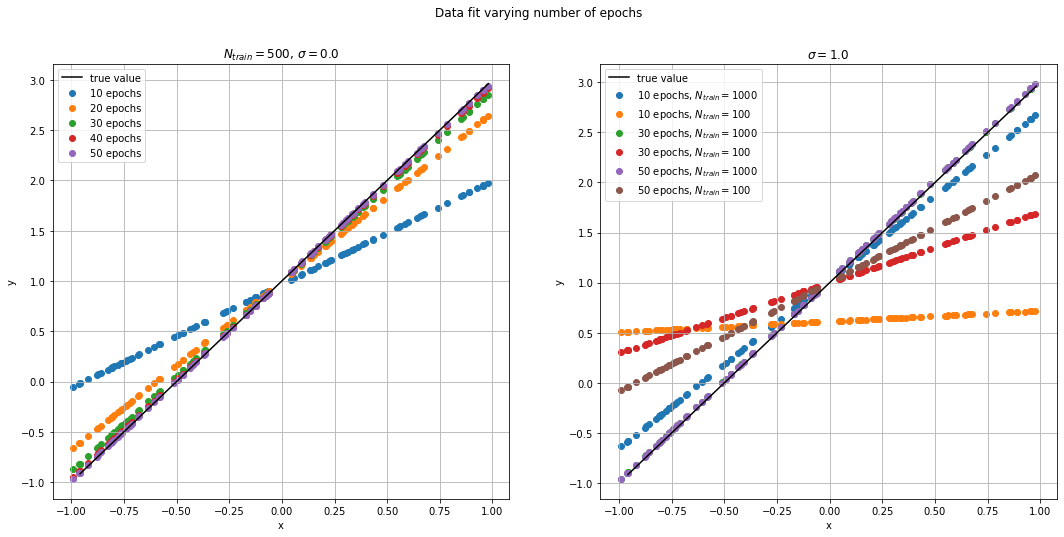

In [15]:
fig,axs = plt.subplots(1,2,figsize=[18,8])

axs[0].plot(x_valid, y_target,c='k', label = 'true value')
axs[1].plot(x_valid, y_target,c='k',label = 'true value')

fig.suptitle('Data fit varying number of epochs')

for i in range (1,6):
    file_name = "lin_fit/"+str(500)+"_"+str(0.0)+"_"+str(i)+".txt"
    y_predicted = np.loadtxt(file_name)
    axs[0].scatter(x_predicted, y_predicted, label = str(i*10) + ' epochs')
    
rng = [1,3,5]

for i in rng:
    file_name = "lin_fit/"+str(1000)+"_"+str(1.0)+"_"+str(i)+".txt"
    y_predicted = np.loadtxt(file_name)
    axs[1].scatter(x_predicted, y_predicted, label = str(i*10) + ' epochs, $N_{train}=1000$') 
    file_name = "lin_fit/"+str(100)+"_"+str(1.0)+"_"+str(i)+".txt"
    y_predicted = np.loadtxt(file_name)
    axs[1].scatter(x_predicted, y_predicted, label = str(i*10) + ' epochs, $N_{train}=100$')

axs[0].set_title('$N_{train}=500$, $\sigma=0.0$')
axs[0].set_ylabel('y')
axs[0].set_xlabel('x')
#axs[0].set_xlim([0,30])
axs[0].legend(loc='best') 
axs[0].grid(True)

axs[1].set_title('$\sigma=1.0$')
axs[1].set_ylabel('y')
axs[1].set_xlabel('x')
axs[1].legend(loc='best')
axs[1].grid(True)

In this first graph we consider the increase of fit with the number of epochs. On the left, the neuron tries to fit data which is produced exaclty on the original line. We see how, even though the data has no deviation from the target distribution, the neuron still needs a minimum of training in order to have a high enough accuracy. 

On the right we see data produced by introducing a deviation of $\sigma = 1.0$: it obviously takes longer for the neuron to correclty fit. Since the neuron trains only two parameters, the predictions will always end up on the same line; if the training is not sufficient, the neuron tries to allign this data on a different line. We can see that, with enough time, the neuron will be able to place the predictions on the target line with high enough accuracy; it takes much less time if the data available is larger.

In order to be sure to reach the point of high accuracy, all following networks are trained over $100$ epochs, with the intermediate data saved 

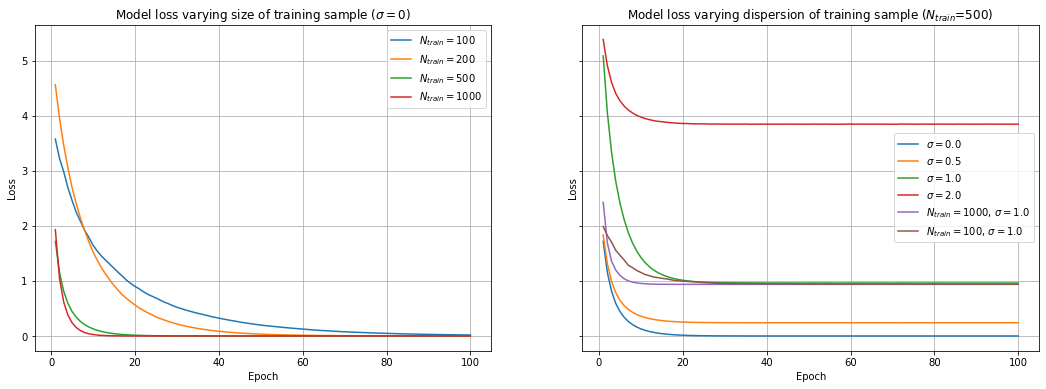

In [9]:
N_train_ = [100,200,500,1000]
sigma_ = [0.0,0.5,1.0,2.0]

fig, axs = plt.subplots (1,2, figsize=[18,6], sharey=True)

for i in N_train_:
    x, loss = np.loadtxt("lin_fit/"+str(i)+"_"+str(0.0)+".txt", usecols=(0,1), unpack = True)
    axs[0].plot(x, loss, label = "$N_{train}=$"+str(i))
    
for i in sigma_:
    x, loss = np.loadtxt("lin_fit/"+str(500)+"_"+str(i)+".txt", usecols=(0,1), unpack = True)
    axs[1].plot(x, loss, label = "$\sigma=$" + str(i))

x, loss = np.loadtxt("lin_fit/"+str(1000)+"_"+str(1.0)+".txt", usecols=(0,1), unpack = True)
axs[1].plot(x, loss, label = "$N_{train}=1000$, $\sigma = 1.0$" )
x, loss = np.loadtxt("lin_fit/"+str(100)+"_"+str(1.0)+".txt", usecols=(0,1), unpack = True)
axs[1].plot(x, loss, label = "$N_{train}=100$, $\sigma = 1.0$" )

axs[0].set_title('Model loss varying size of training sample ($\sigma=0$)')
axs[0].set_ylabel('Loss')
axs[0].set_xlabel('Epoch')
#axs[0].set_xlim([0,30])
axs[0].legend(loc='best') 
axs[0].grid(True)

axs[1].set_title('Model loss varying dispersion of training sample ($N_{train}$=500)')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend(loc='best')
axs[1].grid(True)


plt.show()
    

Here on the left we compare the role of sample size to train the neuron over the number of epochs. As already noted, reguardless of data sample size the loss in prediction tends to zero; efficiency however increases remarkably, as the number of epochs the neuron needs to converge tend to decrease. This speed-up is not linear: there is a much more marked improvement in passing from $N_{train}=200$ to $ N_{train} = 500$ than from the latter to $ N_{train} = 1000$. For the rest of the attempts, I used mainly a training sample of $ N_{train} = 500$ in order to have a quick convergence while saving time for the training, as obviously a larger sample requires a longer time to be elaborated.

On the right, we compare instead the minimum loss with training for different traininig data dispersion. We can notice right away that an arbitrary precision cannot be obtained if the training set results spurious in respect to the target distribution. Some attempts were made with different sample size, but other than speed of convergence very little changes. This means that the final accuracy strongly depends of the *goodness* of the data the neuron is fed: it cannot extrapolate better than it is taught.

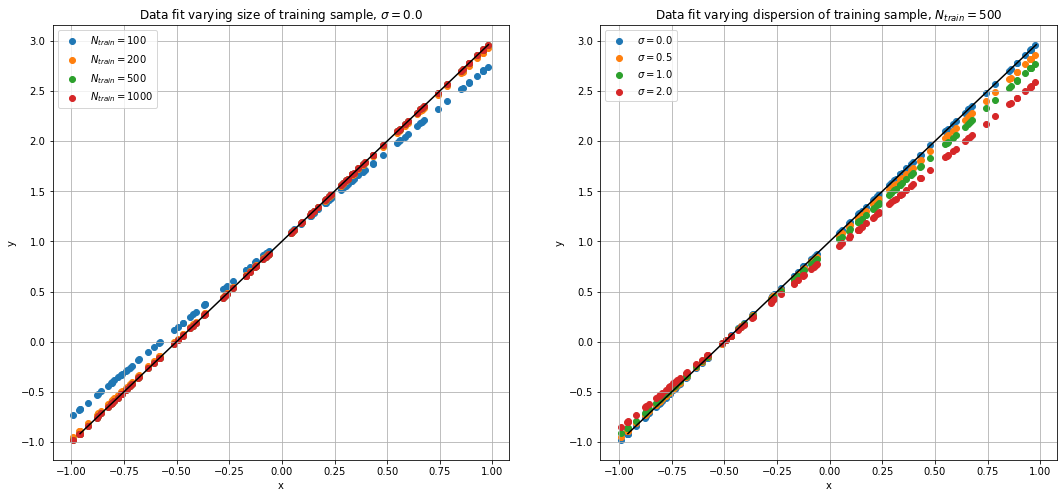

In [14]:
N_train_ = [100,200,500,1000]
sigma_ = [0.0,0.5,1.0,2.0]
fig, axs = plt.subplots(1,2,figsize=[18,8])

axs[0].plot(x_valid, y_target,c='k')
axs[1].plot(x_valid, y_target,c='k')

for i in N_train_:
    y_predicted = np.loadtxt("lin_fit/"+str(i)+"_"+str(0.0)+".txt", usecols=(2), unpack = True)

    axs[0].scatter(x_predicted, y_predicted, label = "$N_{train}=$"+str(i))
    axs[0].set_title('Data fit varying size of training sample, $\sigma=0.0$')
    axs[0].set_ylabel('y')
    axs[0].set_xlabel('x')
    axs[0].legend(loc='best')
    
for i in sigma_:
    y_predicted = np.loadtxt("lin_fit/"+str(500)+"_"+str(i)+".txt", usecols=(2), unpack = True)

    axs[1].scatter(x_predicted, y_predicted, label = "$\sigma=$"+str(i))
    axs[1].set_title('Data fit varying dispersion of training sample, $N_{train}=500$')
    axs[1].set_ylabel('y')
    axs[1].set_xlabel('x')
    axs[1].legend(loc='best')

axs[0].grid(True)
axs[1].grid(True)

plt.show()

These final graphs show the optimal fit for different training sample sizes and for different dispersions after 100 epochs.

### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

In order to make practice with NN, explore reasonable different choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Make graphs comparing fits for different NNs.
Check your NN models by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

The main difference with the previous example is that two parameters are not sufficient to describe the function in question: instead of a single neuron, a network is built to increase accuracy in the prediction, while trying to use as little resources as possible. 

Before starting, I'd underline how, when including more neurons, two layers are always necessary: the final layer always needs to be consituted of the same number of parameters needed. In this case we always add a final single-neuron layer in order to produce a single output to each input to have a regression.

The training data set consists in samples of $N_{train}=5000 \in [-1,1]$ elements generated with a dispersion $\sigma = 0.6$, in order to avoid an ideal case in which it would be difficult to appreciate the differences of the various architecture. For the same reason, only 30 epochs of training were used.

In [17]:
# target parameters of f(x) = a+b*x+c*x^2+d*x^3
def f(x):
    a = 4 
    b = -3 
    c = -2
    d = 3
    return a+b*x+c*(x**2)+d*(x**3)

In [18]:
# generate training inputs
N_train = 5000    # seems an adequate number
N_valid = 500
sigma = 0.6     # noise standard deviation
epoch = 30       # not too many, just to appreciate differences

np.random.seed(0)
x_predicted = np.random.uniform(-1, 1, 150)
x_predicted.sort()
y_predicted = f(x_predicted)

x_outside = np.random.uniform(-2, 2, 150)
x_outside.sort()
y_outside = f(x_outside)

x_train = np.random.uniform(-1, 1, N_train)
x_valid = np.random.uniform(-1, 1, N_valid)
x_valid.sort()
y_target = f(x_valid) # ideal (target) linear function

y_train = np.random.normal(f(x_train), sigma) 
y_valid = np.random.normal(f(x_valid), sigma)

epoch_ = np.arange(1,epoch+1)

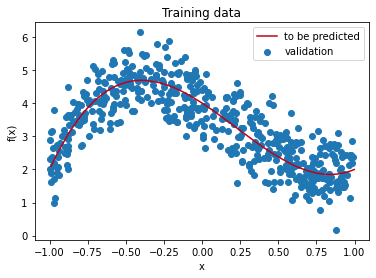

In [19]:
# Plot training & validation loss values
plt.scatter(x_valid,y_valid, label = 'validation')
plt.plot(x_predicted, y_predicted, label = 'to be predicted', c='xkcd:scarlet')
plt.title('Training data')
plt.ylabel('f(x)')
plt.xlabel('x')
plt.legend( loc='best')
plt.show()

In [58]:
# possibilities of layers and layer size
ln = 3
fl = 32
sl = 64
tl = 64
fthl = 32

In [59]:
model_m = tf.keras.Sequential()
model_m.add(Dense(fl, input_shape=(1,),activation='relu'))
model_m.add(Dense(sl,activation='relu'))
model_m.add(Dense(tl,activation='relu'))

model_m.add(Dense(1,))

model_m.compile(optimizer='sgd', loss='mse', metrics=['mse']) # standard choice, for now
model_m.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 32)                64        
_________________________________________________________________
dense_28 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_29 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 65        
Total params: 6,401
Trainable params: 6,401
Non-trainable params: 0
_________________________________________________________________


In [60]:
history_m = model_m.fit(x=x_train, y=y_train, 
                      batch_size=32, epochs=epoch,
                      shuffle=True, # a good idea is to shuffle input before at each epoch
                      validation_data=(x_valid, y_valid),
                       verbose=0)

In [61]:
filename = "poly_fit/"+str(fl)+"_"+str(sl)+"_"+str(ln)+"r.txt"
pred_filename = "poly_fit/"+str(fl)+"_"+str(sl)+"_"+str(ln)+"_prediction_r.txt"

# saves prediction in array and manages it in order to save it in file
y_pred = model_m.predict(x_predicted)                    # saves to file predicted values on same sample
y_pred = np.array(y_pred)
y_pred = y_pred.flatten()

y_pred_out = model_m.predict(x_outside)                    
y_pred_out = np.array(y_pred_out)
y_pred_out = y_pred_out.flatten()

with open(pred_filename, 'w') as fh:
    fh.writelines(map("{}\t{}\t{}\t{}\n".format, x_predicted, y_pred, x_outside, y_pred_out))

with open(filename, 'w') as fh:
    fh.writelines(map("{}\t{}\n".format, epoch_, history_m.history['loss']))

score = model_m.evaluate(x_valid, y_valid, batch_size=32, verbose=2)
with open("lin_fit/score_compare.txt",'a') as f:
    f.write(str(fl)+'\t'+str(sl)+'\t'+str(ln)+'\t'+str(score[0])+'\t'+str(score[1])+'\n')

    
print (pred_filename)

500/1 - 0s - loss: 0.2963 - mse: 0.3545
poly_fit/32_64_3_prediction_r.txt


In [31]:
def print_NN (fl, sl, ln):
    y_pred, y_pred_out = np.loadtxt("poly_fit/"+str(fl)+"_"+str(sl)+"_"+str(ln)+"_prediction_r.txt", usecols =(1,3), unpack = True)
    axs[0].scatter(x_predicted, y_pred, label = str(fl) +' & '+ str(sl) + 'x'+ str(ln - 1)+' neurons', s = 10)
    axs[1].scatter(x_outside, y_pred_out, label = str(fl) +' & '+ str(sl) + 'x'+ str(ln - 1)+' neurons', s = 10)
    
    x, loss = np.loadtxt("poly_fit/"+str(fl)+"_"+str(sl)+"_"+str(ln)+"r.txt", usecols=(0,1), unpack = True)
    axs[2].plot(x, loss, label = str(fl) +' & '+ str(sl) + ' x '+ str(ln - 1)+' neurons')  

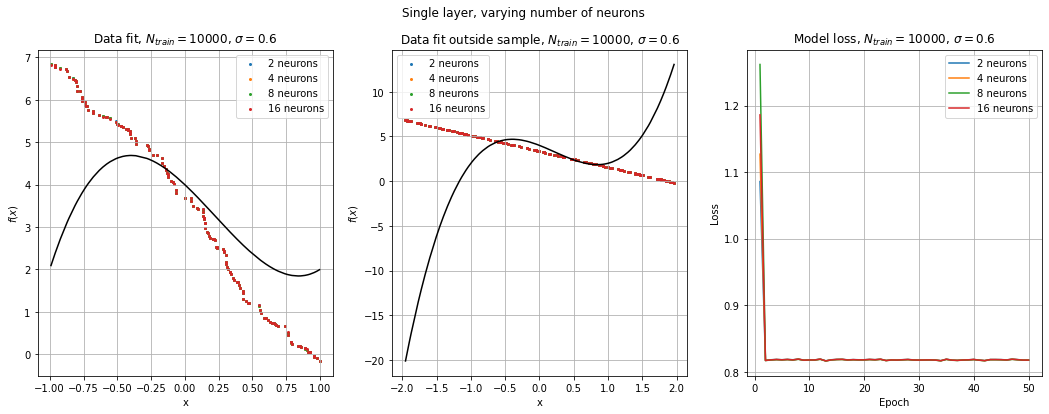

In [18]:
#2 layers, no acceptance
first_lay = [2,4,8,16]
fig, axs = plt.subplots(1,3,figsize=[18,6])
fig.suptitle ('Single layer, varying number of neurons')

axs[0].plot(x_predicted, y_predicted, c='k')
axs[1].plot(x_outside, y_outside, c='k')

for i in first_lay:
    y_pred, y_pred_out = np.loadtxt("poly_fit/"+str(i)+"_"+str(1)+"_prediction.txt", usecols =(0,1), unpack = True)
    axs[0].scatter(x_predicted, y_pred_out, label = str(i) + ' neurons', s = 4)
    axs[1].scatter(x_outside, y_pred_out, label = str(i) + ' neurons', s = 4)
    
    x, loss = np.loadtxt("poly_fit/"+str(i)+"_"+str(1)+".txt", usecols=(0,1), unpack = True)
    axs[2].plot(x, loss, label = str(i) + ' neurons')  

axs[0].grid(True)
axs[0].set_title('Data fit, $N_{train}=$10000, $\sigma=$'+str(sigma))
axs[0].set_ylabel('$f(x)$')
axs[0].set_xlabel('x')
axs[0].legend(loc='best')

axs[1].grid(True)
axs[1].set_title('Data fit outside sample, $N_{train}=10000$, $\sigma=$'+str(sigma))
axs[1].set_ylabel('$f(x)$')
axs[1].set_xlabel('x')
axs[1].legend(loc='best')

axs[2].set_title('Model loss, $N_{train}=10000$, $\sigma=$'+str(sigma))
axs[2].set_ylabel('Loss')
axs[2].set_xlabel('Epoch')
axs[2].legend(loc='best')
axs[2].grid(True)
  
plt.show()
# needs activation function!!!

The first attempt was made by simply adding more and more neurons to the first layer, in order to increment the parameters that fit our input. However, something is obviously wrong: the regression of the polynomial actually resembles more a linear fit. This is due to a very innocent yet fatal error: no activation function was given to the layers! The network otherwise will activate all neurons in the network every time, effectively reducing the whole architecture to a single, large neuron which is not able to interpet a fit other than as a line. The following graphs attempt to deal with the same objective, adding this time a *relu* activation function in every layer.

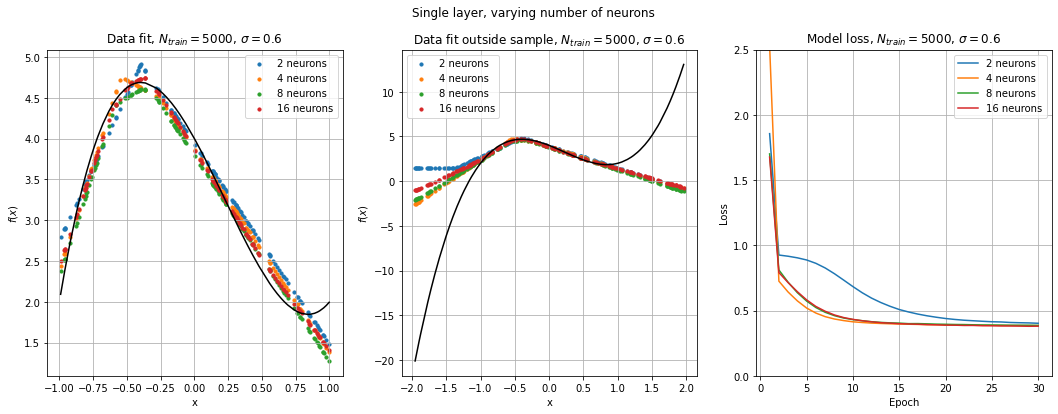

In [23]:
# 2 layers

fig, axs = plt.subplots(1,3,figsize=[18,6])
fig.suptitle ('Single layer, varying number of neurons')

axs[0].plot(x_predicted, y_predicted, c='k')
axs[1].plot(x_outside, y_outside, c='k')

first_lay = [2,4,8,16]

for i in first_lay:
    y_pred, y_pred_out = np.loadtxt("poly_fit/"+str(i)+"_2_1_prediction_r.txt", usecols =(1,3), unpack = True)
    axs[0].scatter(x_predicted, y_pred, label = str(i) + ' neurons', s = 10)
    axs[1].scatter(x_outside, y_pred_out, label = str(i) + ' neurons', s = 10)
    
    x, loss = np.loadtxt("poly_fit/"+str(i)+"_2_1r.txt", usecols=(0,1), unpack = True)
    axs[2].plot(x, loss, label = str(i) + ' neurons')  

axs[0].grid(True)
axs[0].set_title('Data fit, $N_{train}=$'+str(N_train)+', $\sigma=$'+str(sigma))
axs[0].set_ylabel('$f(x)$')
axs[0].set_xlabel('x')
axs[0].legend(loc='best')

axs[1].grid(True)
axs[1].set_title('Data fit outside sample, $N_{train}=$'+str(N_train)+', $\sigma=$'+str(sigma))
axs[1].set_ylabel('$f(x)$')
axs[1].set_xlabel('x')
axs[1].legend(loc='best')

axs[2].set_title('Model loss, $N_{train}=$'+str(N_train)+', $\sigma=$'+str(sigma))
axs[2].set_ylabel('Loss')
axs[2].set_xlabel('Epoch')
axs[2].legend(loc='best')
axs[2].set_ylim([0,2.5])
axs[2].grid(True)
  
plt.show()

Now that we have cleared the issue with the importance of an activation function, we try ti handle the problem of network architecture.

We see now that, with more than one neuron, the network starts making plausible predictions. The predicted shape obviously is not optimal, but the network starts to recognise the non-linear characteristics of the training data. This single-layer architecture does not seem to depend direclty on the size of the layer, as all predictions gain the same accuracy. The only noticible difference is in the rapidity of convergence, as shown on the graph on the right. As we already noticed, the loss never becomes optimal, but converges for all layer sizes to a lower bound.

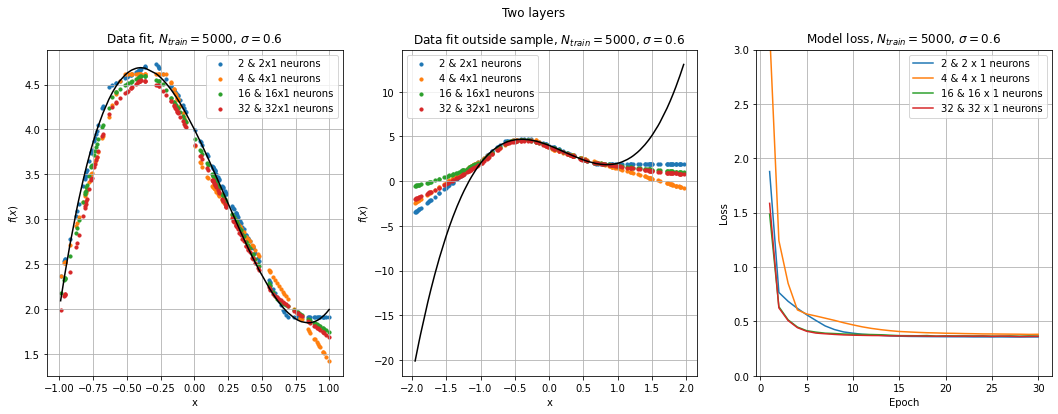

In [26]:
# 3 layers
fig, axs = plt.subplots(1,3,figsize=[18,6])
fig.suptitle ('Two layers')

axs[0].plot(x_predicted, y_predicted, c='k')
axs[1].plot(x_outside, y_outside, c='k')

first_lay = [2,4,16,32]

for j in first_lay:
    print_NN(j,j,2)

axs[0].grid(True)
axs[0].set_title('Data fit, $N_{train}=$'+str(N_train)+', $\sigma=$'+str(sigma))
axs[0].set_ylabel('$f(x)$')
axs[0].set_xlabel('x')
axs[0].legend(loc='best')

axs[1].grid(True)
axs[1].set_title('Data fit outside sample, $N_{train}=$'+str(N_train)+', $\sigma=$'+str(sigma))
axs[1].set_ylabel('$f(x)$')
axs[1].set_xlabel('x')
axs[1].legend(loc='best')

axs[2].set_title('Model loss, $N_{train}=$'+str(N_train)+', $\sigma=$'+str(sigma))
axs[2].set_ylabel('Loss')
axs[2].set_xlabel('Epoch')
axs[2].legend(loc='best')
axs[2].grid(True)
axs[2].set_ylim([0,3])
  
plt.show()

By adding a new layer (for simplicity, of the same size of the first) we see a slight improvement: the prediction begins to show a little more polynomial behaviour, with some curvature in proximity to the peak instead of being just two joined straight lines. We see, on a larger scale in the central graph, how inside the dominion of the training sample the accordance with target distribution is quite good, while outside it's like the network is not even making an effort, but actually continues the same trajectory which the numbers had inside the dominion of interest. This is because the parameters set by the training reguard only the training and validation set: the network has no information of what the target distribution might be, so if it never samples the function's behaviour outside of $[-1,1]$ it will never know what ot predict. 

We still notice that the loss improves a little, but still stabilises on a finite plateau after a number of training epochs.

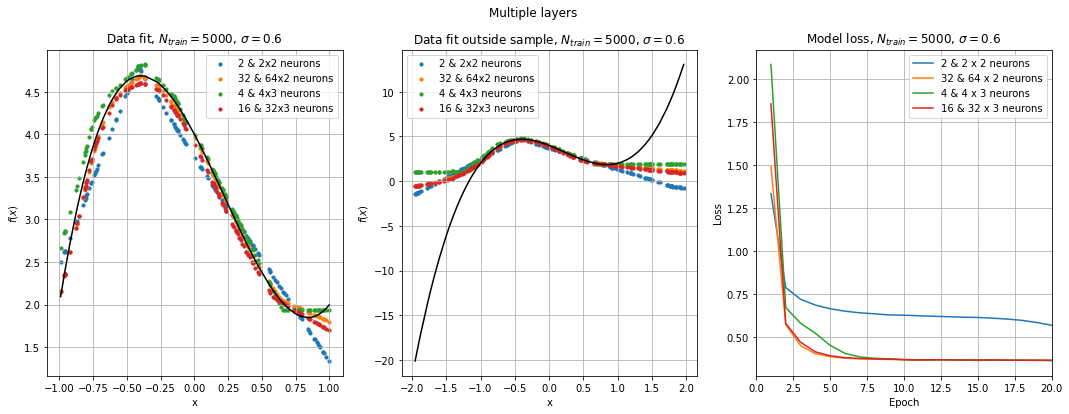

In [62]:
# more layers

fig, axs = plt.subplots(1,3,figsize=[18,6])
fig.suptitle ('Multiple layers')

axs[0].plot(x_predicted, y_predicted, c='k')
axs[1].plot(x_outside, y_outside, c='k')

# 2 & 2 & 2
print_NN (2,2,3)

# 32 & 64 & 64
print_NN (32,64,3)

#4 & 4 & 4 & 4
print_NN(4,4,4)

#16 & 32 & 64 & 8
print_NN(16,32,4)

axs[0].grid(True)
axs[0].set_title('Data fit, $N_{train}=$'+str(N_train)+', $\sigma=$'+str(sigma))
axs[0].set_ylabel('$f(x)$')
axs[0].set_xlabel('x')
axs[0].legend(loc='best')

axs[1].grid(True)
axs[1].set_title('Data fit outside sample, $N_{train}=$'+str(N_train)+', $\sigma=$'+str(sigma))
axs[1].set_ylabel('$f(x)$')
axs[1].set_xlabel('x')
axs[1].legend(loc='best')

axs[2].set_title('Model loss, $N_{train}=$'+str(N_train)+', $\sigma=$'+str(sigma))
axs[2].set_ylabel('Loss')
axs[2].set_xlabel('Epoch')
axs[2].legend(loc='best')
axs[2].set_xlim([0,20])
axs[2].grid(True)

plt.show()

By adding an additional layer, the prediction start to increase in accuracy. We see that even for quite a small number of neurons, such as the first  2 & 2 & 2 & 1 layer layout, we have a prediction that inside the training dominion begins to predict accuratly. As the size of layers increase, the accuracy improves notably; not so much by adding a further fourth layer: as we have seen for the training sample size, there is a sort of upper bound for improvement given the available data. There seems not to be great difference if the same number of neurons is structured in two or three hidden layers.
Outside of the dominion the prediction still miss -and by a lot- the target data, since the network never received information of the behaviour outside of the training domain.

The accuracy immprovement can be seen also by looking at the loss function evolution: it still reaches a plateau it cannot go under, but it significally got lower: even if the training data is not ideal, the network is able to infer parameters that optimise the validation data, thus recognising a global tendency even considering the deviation factor.


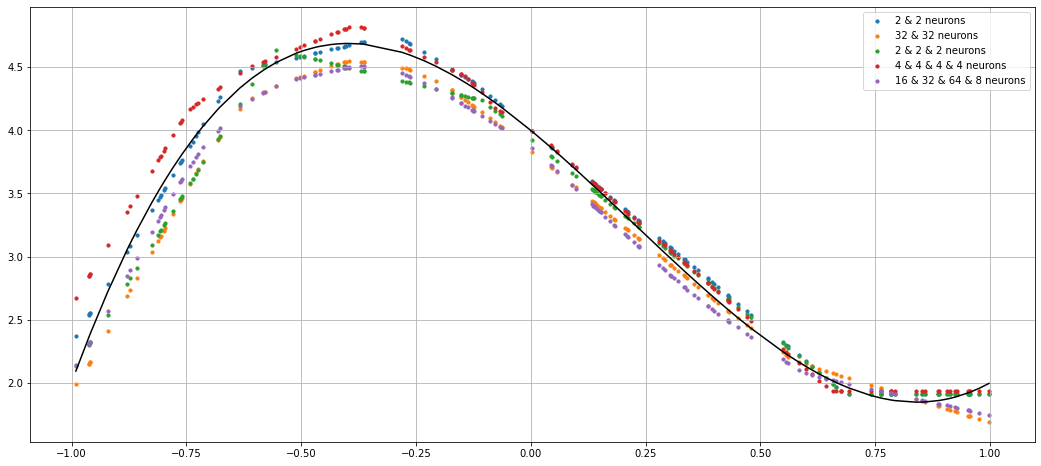

In [22]:
# comparison of different structures

fig = plt.figure (figsize=[18,8])
plt.plot(x_predicted, y_predicted, c='k')

# 2 & 2
y_pred = np.loadtxt("poly_fit/2_2_2_prediction_r.txt", usecols =(1), unpack = True)
plt.scatter(x_predicted, y_pred, label = '2 & 2 neurons', s = 10)

# 32 & 32
y_pred = np.loadtxt("poly_fit/32_32_2_prediction_r.txt", usecols =(1), unpack = True)
plt.scatter(x_predicted, y_pred, label = '32 & 32 neurons', s = 10)

# 2 & 2 & 2
y_pred = np.loadtxt("poly_fit/2_2_3_prediction_r.txt", usecols =(1), unpack = True)
plt.scatter(x_predicted, y_pred, label = '2 & 2 & 2 neurons', s = 10)

#4 & 4 & 4 & 4
y_pred = np.loadtxt("poly_fit/4_4_4_prediction_r.txt", usecols =(1), unpack = True)
plt.scatter(x_predicted, y_pred, label = '4 & 4 & 4 & 4 neurons', s = 10)

#16 & 32 & 64 & 8
y_pred = np.loadtxt("poly_fit/16_32_4_prediction_r.txt", usecols =(1), unpack = True)
plt.scatter(x_predicted, y_pred, label = '16 & 32 & 64 & 8 neurons', s = 10)

plt.legend()
plt.grid(True)

We finally compare some of the architectures shown before, changing both in layer size and depth. We can see that to the naked eye the results are quite similar, still knowing that deeper networks are able to lower the loss. There is no significant imporvement in using more resources, so we will limit layer size to have shorter training times.

Having investigated different architectures, I selected two representative structure, 2 & 4 & 8 & 1 and 4 & 4 & 4 & 4 & 1, to determine the optimal combination of activation function, optimisation function and loss functions. To work organically, like in a genetic algorithm, after each set of functions was attempted I passed to the next keeping the best previous configuration.

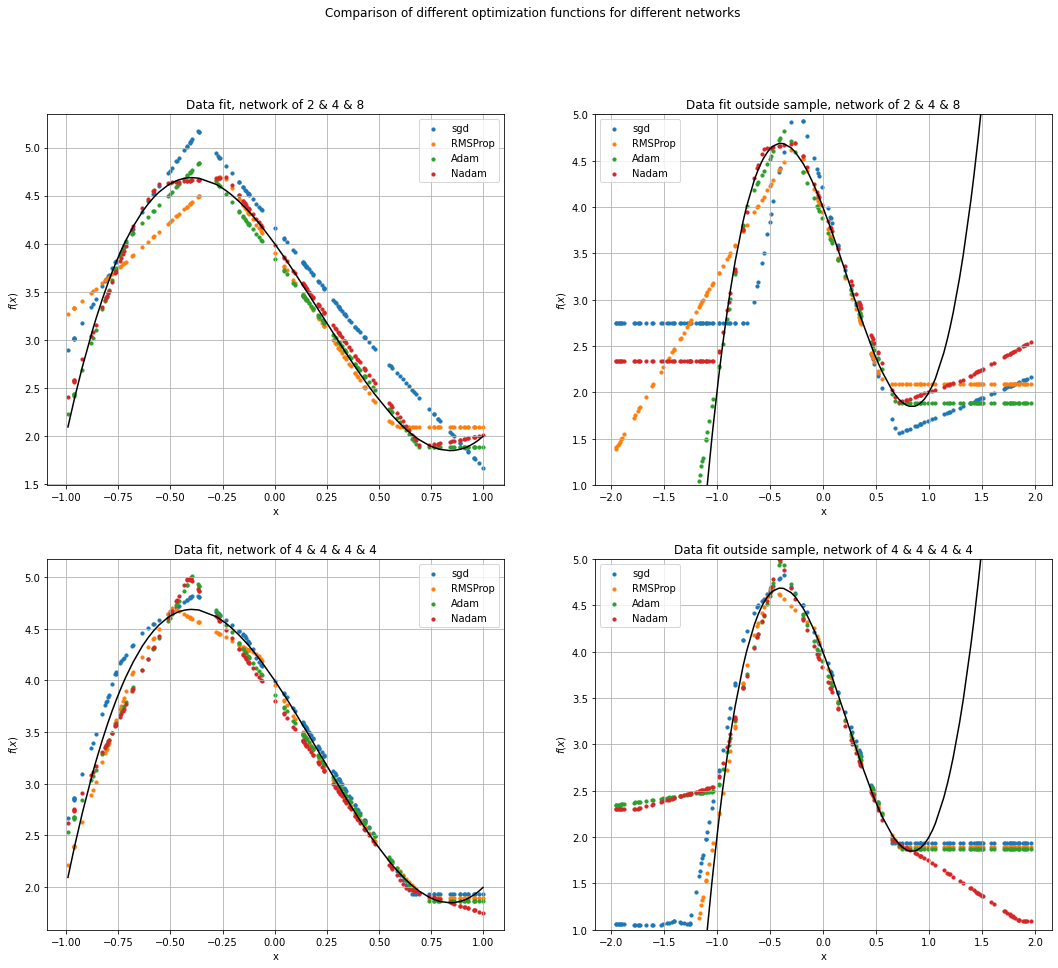

In [64]:
# optimization

fig, axs = plt.subplots(2,2,figsize=[18,15])
fig.suptitle ('Comparison of different optimization functions for different networks')

axs[0][0].plot(x_predicted, y_predicted, c='k')
axs[0][1].plot(x_outside, y_outside, c='k')
axs[1][0].plot(x_predicted, y_predicted, c='k')
axs[1][1].plot(x_outside, y_outside, c='k')

# SGD
y_pred, y_pred_out = np.loadtxt("poly_fit/2_4_3_prediction_r.txt", usecols =(1,3), unpack = True)
axs[0][0].scatter(x_predicted, y_pred, label = 'sgd', s = 10)
axs[0][1].scatter(x_outside, y_pred_out, label = 'sgd', s = 10)

#RMSProp
y_pred, y_pred_out = np.loadtxt("poly_fit/2_4_3_prediction_rr.txt", usecols =(1,3), unpack = True)
axs[0][0].scatter(x_predicted, y_pred, label = 'RMSProp', s = 10)
axs[0][1].scatter(x_outside, y_pred_out, label = 'RMSProp', s = 10)

#Adam
y_pred, y_pred_out = np.loadtxt("poly_fit/2_4_3_prediction_ar.txt", usecols =(1,3), unpack = True)
axs[0][0].scatter(x_predicted, y_pred, label = 'Adam', s = 10)
axs[0][1].scatter(x_outside, y_pred_out, label = 'Adam', s = 10)

#Nadam
y_pred, y_pred_out = np.loadtxt("poly_fit/2_4_3_prediction_nr.txt", usecols =(1,3), unpack = True)
axs[0][0].scatter(x_predicted, y_pred, label = 'Nadam', s = 10)
axs[0][1].scatter(x_outside, y_pred_out, label = 'Nadam', s = 10)

axs[0][0].grid(True)
axs[0][0].set_title('Data fit, network of 2 & 4 & 8')
axs[0][0].set_ylabel('$f(x)$')
axs[0][0].set_xlabel('x')
axs[0][0].legend(loc='best')

axs[0][1].grid(True)
axs[0][1].set_title('Data fit outside sample, network of 2 & 4 & 8')
axs[0][1].set_ylabel('$f(x)$')
axs[0][1].set_xlabel('x')
axs[0][1].set_ylim([1,5])
axs[0][1].legend(loc='best')

# SGD
y_pred, y_pred_out = np.loadtxt("poly_fit/4_4_4_prediction_r.txt", usecols =(1,3), unpack = True)
axs[1][0].scatter(x_predicted, y_pred, label = 'sgd', s = 10)
axs[1][1].scatter(x_outside, y_pred_out, label = 'sgd', s = 10)

#RMSProp
y_pred, y_pred_out = np.loadtxt("poly_fit/4_4_4_prediction_rr.txt", usecols =(1,3), unpack = True)
axs[1][0].scatter(x_predicted, y_pred, label = 'RMSProp', s = 10)
axs[1][1].scatter(x_outside, y_pred_out, label = 'RMSProp', s = 10)

#Adam
y_pred, y_pred_out = np.loadtxt("poly_fit/4_4_4_prediction_ar.txt", usecols =(1,3), unpack = True)
axs[1][0].scatter(x_predicted, y_pred, label = 'Adam', s = 10)
axs[1][1].scatter(x_outside, y_pred_out, label = 'Adam', s = 10)

#Nadam
y_pred, y_pred_out = np.loadtxt("poly_fit/4_4_4_prediction_nr.txt", usecols =(1,3), unpack = True)
axs[1][0].scatter(x_predicted, y_pred, label = 'Nadam', s = 10)
axs[1][1].scatter(x_outside, y_pred_out, label = 'Nadam', s = 10)

axs[1][0].grid(True)
axs[1][0].set_title('Data fit, network of 4 & 4 & 4 & 4')
axs[1][0].set_ylabel('$f(x)$')
axs[1][0].set_xlabel('x')
axs[1][0].legend(loc='best')

axs[1][1].grid(True)
axs[1][1].set_title('Data fit outside sample, network of 4 & 4 & 4 & 4')
axs[1][1].set_ylabel('$f(x)$')
axs[1][1].set_xlabel('x')
axs[1][1].set_ylim([1,5])
axs[1][1].legend(loc='best')
  
plt.show()

First we compare the optimisation functions, how the neuron update their weights to determine the optimal prediction parameters and reduce losses:
- SGD, Stocastic Gradient Descent: performs a parameter update based on the gradient of the parameter estimated for each new data point : $\theta_{n+1} = \theta_{n} - \eta \cdot \nabla_{\theta_{n}}J( x_i,y_i)$
- RMSProp: another gradient method of optimisation of the weights, but instead of changing with every data point it uses a moving average of squared gradients to normalise the "instantaneous" gradient. This way, it solves the issue of vanishing or exploding gradients of the complex fit functions.
- Adam: an evolution of RMSProp, it is based on adaptive estimations like the previous, but with the addition of momentum, as a sort of hybrid SGD and RMSProp
- Nadam: essentially like Adam, it introduces instead a Nesterov accelerated moment, which subsitutes the moment itself instead of the previous weigth in the gradient descent.

This brief presentation of the optimisation functions is obviously not entirely "flour from my sack", or fruit of my labour. I chose these possibilities because I was interested in the comparison of different methods, and we can actually see the differences. On the right, considering the shallower network, we see that some optimisers have some difficulties in recognising the top curve and simply tend to join two different straight lines. In the deeper network there seem to be less problems in the curve, nevertheless there are clear "winners", RMSProp for the first network and Nadam for the second. 

It may seem strange that, in the first case, more evolved versions are outperformed by the older version of the optimiser. However, I would still underline how the attempt considers the smallest number of resources possible, so it might be all a problem of the particular dataset that cannot highlight the possible improvements in the optimsation function. Since neural networks are used to solve quite practical problems, for now I will continue to use this optimiser since it yields the best results.

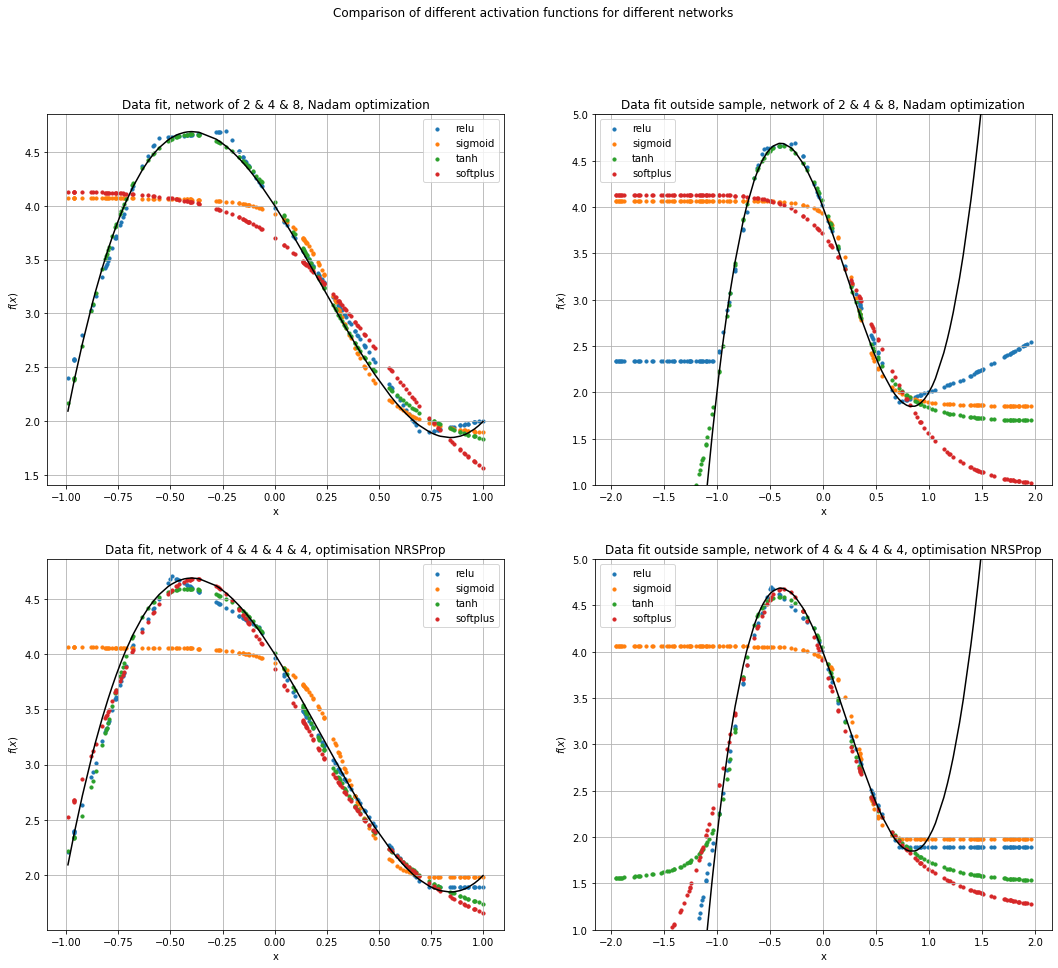

In [65]:
# activation

fig, axs = plt.subplots(2,2,figsize=[18,15])
fig.suptitle ('Comparison of different activation functions for different networks')

axs[0][0].plot(x_predicted, y_predicted, c='k')
axs[0][1].plot(x_outside, y_outside, c='k')
axs[1][0].plot(x_predicted, y_predicted, c='k')
axs[1][1].plot(x_outside, y_outside, c='k')

# relu
y_pred, y_pred_out = np.loadtxt("poly_fit/2_4_3_prediction_nr.txt", usecols =(1,3), unpack = True)
axs[0][0].scatter(x_predicted, y_pred, label = 'relu', s = 10)
axs[0][1].scatter(x_outside, y_pred_out, label = 'relu', s = 10)

#sigmoid
y_pred, y_pred_out = np.loadtxt("poly_fit/2_4_3_prediction_ns.txt", usecols =(1,3), unpack = True)
axs[0][0].scatter(x_predicted, y_pred, label = 'sigmoid', s = 10)
axs[0][1].scatter(x_outside, y_pred_out, label = 'sigmoid', s = 10)

#tanh
y_pred, y_pred_out = np.loadtxt("poly_fit/2_4_3_prediction_nt.txt", usecols =(1,3), unpack = True)
axs[0][0].scatter(x_predicted, y_pred, label = 'tanh', s = 10)
axs[0][1].scatter(x_outside, y_pred_out, label = 'tanh', s = 10)

#softplus
y_pred, y_pred_out = np.loadtxt("poly_fit/2_4_3_prediction_nsp.txt", usecols =(1,3), unpack = True)
axs[0][0].scatter(x_predicted, y_pred, label = 'softplus', s = 10)
axs[0][1].scatter(x_outside, y_pred_out, label = 'softplus', s = 10)

axs[0][0].grid(True)
axs[0][0].set_title('Data fit, network of 2 & 4 & 8, Nadam optimization')
axs[0][0].set_ylabel('$f(x)$')
axs[0][0].set_xlabel('x')
axs[0][0].legend(loc='best')

axs[0][1].grid(True)
axs[0][1].set_title('Data fit outside sample, network of 2 & 4 & 8, Nadam optimization')
axs[0][1].set_ylabel('$f(x)$')
axs[0][1].set_xlabel('x')
axs[0][1].set_ylim([1,5])
axs[0][1].legend(loc='best')

# relu
y_pred, y_pred_out = np.loadtxt("poly_fit/4_4_4_prediction_rr.txt", usecols =(1,3), unpack = True)
axs[1][0].scatter(x_predicted, y_pred, label = 'relu', s = 10)
axs[1][1].scatter(x_outside, y_pred_out, label = 'relu', s = 10)

# sigmoid
y_pred, y_pred_out = np.loadtxt("poly_fit/4_4_4_prediction_ns.txt", usecols =(1,3), unpack = True)
axs[1][0].scatter(x_predicted, y_pred, label = 'sigmoid', s = 10)
axs[1][1].scatter(x_outside, y_pred_out, label = 'sigmoid', s = 10)

# tanh
y_pred, y_pred_out = np.loadtxt("poly_fit/4_4_4_prediction_nt.txt", usecols =(1,3), unpack = True)
axs[1][0].scatter(x_predicted, y_pred, label = 'tanh', s = 10)
axs[1][1].scatter(x_outside, y_pred_out, label = 'tanh', s = 10)

#Nadam
y_pred, y_pred_out = np.loadtxt("poly_fit/4_4_4_prediction_nsp.txt", usecols =(1,3), unpack = True)
axs[1][0].scatter(x_predicted, y_pred, label = 'softplus', s = 10)
axs[1][1].scatter(x_outside, y_pred_out, label = 'softplus', s = 10)

axs[1][0].grid(True)
axs[1][0].set_title('Data fit, network of 4 & 4 & 4 & 4, optimisation NRSProp')
axs[1][0].set_ylabel('$f(x)$')
axs[1][0].set_xlabel('x')
axs[1][0].legend(loc='best')

axs[1][1].grid(True)
axs[1][1].set_title('Data fit outside sample, network of 4 & 4 & 4 & 4, optimisation NRSProp')
axs[1][1].set_ylabel('$f(x)$')
axs[1][1].set_xlabel('x')
axs[1][1].set_ylim([1,5])
axs[1][1].legend(loc='best')
  
plt.show()

We compare now the different activation functions, which decides how the weighted input is transformed into the output it passes to the next layer:
- Rectified Linear Activation, *relu*: null for negative weight, linear afterwards. It does not have a maximum value it can pass
- Logistic, *sigmoid* : the output is limited between 0 and 1, it corresponds losely to a *rounded step function*. Unlike *relu*, it limits the output, therefore larger input values all have the same weight on the following layer
- Hyperbolic tangent: it has the same properties of the sigmoid, with the difference that it works between $[-1,1]$ and that it is a little steeper, resembling more the step function.
- Generalised logistic function, *softmax*: it applies the normalised exponential to every element it receives, as if it were a thermal state. It usually is used as the optimiser for the last layer in a neural-network classifier, as it returns the optimal choice among many possible outcomes.

We can highlight right away how the *sigmoid* is not the best choice, as for both architectures it tends to recognise only the fact that at some point there is a descent. *Softmax* presents the same problem for the shallower network, while it seems to work better on the deeper network. Nevertheless, they are are certainly outperformed by *relu* and *tanh*, even though they work in very different ways. In the end, I chose to keep the *tanh* since it seems to work best around the corners and at the border of the training domanin.

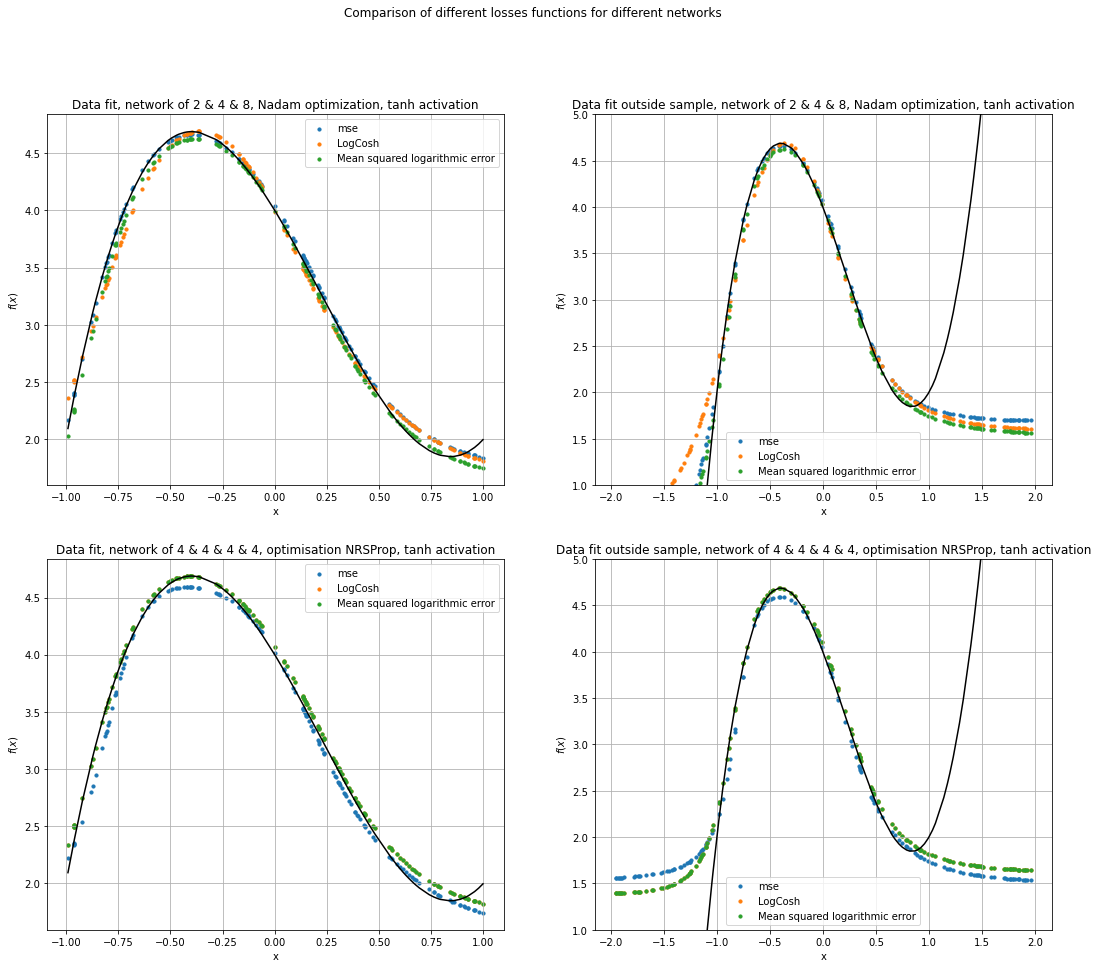

In [66]:
# loss
fig, axs = plt.subplots(2,2,figsize=[18,15])
fig.suptitle ('Comparison of different losses functions for different networks')

axs[0][0].plot(x_predicted, y_predicted, c='k')
axs[0][1].plot(x_outside, y_outside, c='k')
axs[1][0].plot(x_predicted, y_predicted, c='k')
axs[1][1].plot(x_outside, y_outside, c='k')

# mse 
y_pred, y_pred_out = np.loadtxt("poly_fit/2_4_3_prediction_nt.txt", usecols =(1,3), unpack = True)
axs[0][0].scatter(x_predicted, y_pred, label = 'mse', s = 10)
axs[0][1].scatter(x_outside, y_pred_out, label = 'mse', s = 10)

# LogCosh
y_pred, y_pred_out = np.loadtxt("poly_fit/2_4_3_prediction_ntl.txt", usecols =(1,3), unpack = True)
axs[0][0].scatter(x_predicted, y_pred, label = 'LogCosh', s = 10)
axs[0][1].scatter(x_outside, y_pred_out, label = 'LogCosh', s = 10)

# mean_squared_logarithmic_error
y_pred, y_pred_out = np.loadtxt("poly_fit/2_4_3_prediction_ntm.txt", usecols =(1,3), unpack = True)
axs[0][0].scatter(x_predicted, y_pred, label = 'Mean squared logarithmic error', s = 10)
axs[0][1].scatter(x_outside, y_pred_out, label = 'Mean squared logarithmic error', s = 10)

axs[0][0].grid(True)
axs[0][0].set_title('Data fit, network of 2 & 4 & 8, Nadam optimization, tanh activation')
axs[0][0].set_ylabel('$f(x)$')
axs[0][0].set_xlabel('x')
axs[0][0].legend(loc='best')

axs[0][1].grid(True)
axs[0][1].set_title('Data fit outside sample, network of 2 & 4 & 8, Nadam optimization, tanh activation')
axs[0][1].set_ylabel('$f(x)$')
axs[0][1].set_xlabel('x')
axs[0][1].set_ylim([1,5])
axs[0][1].legend(loc='best')

# mse
y_pred, y_pred_out = np.loadtxt("poly_fit/4_4_4_prediction_nt.txt", usecols =(1,3), unpack = True)
axs[1][0].scatter(x_predicted, y_pred, label = 'mse', s = 10)
axs[1][1].scatter(x_outside, y_pred_out, label = 'mse', s = 10)

# LogCosh
y_pred, y_pred_out = np.loadtxt("poly_fit/4_4_4_prediction_rtl.txt", usecols =(1,3), unpack = True)
axs[1][0].scatter(x_predicted, y_pred, label = 'LogCosh', s = 10)
axs[1][1].scatter(x_outside, y_pred_out, label = 'LogCosh', s = 10)

# LogCosh
y_pred, y_pred_out = np.loadtxt("poly_fit/4_4_4_prediction_rtl.txt", usecols =(1,3), unpack = True)
axs[1][0].scatter(x_predicted, y_pred, label = 'Mean squared logarithmic error', s = 10)
axs[1][1].scatter(x_outside, y_pred_out, label = 'Mean squared logarithmic error', s = 10)

axs[1][0].grid(True)
axs[1][0].set_title('Data fit, network of 4 & 4 & 4 & 4, optimisation NRSProp, tanh activation')
axs[1][0].set_ylabel('$f(x)$')
axs[1][0].set_xlabel('x')
axs[1][0].legend(loc='best')

axs[1][1].grid(True)
axs[1][1].set_title('Data fit outside sample, network of 4 & 4 & 4 & 4, optimisation NRSProp, tanh activation')
axs[1][1].set_ylabel('$f(x)$')
axs[1][1].set_xlabel('x')
axs[1][1].set_ylim([1,5])
axs[1][1].legend(loc='best')
  
plt.show()

Finally, we face the different loss functions, how the neuron estimates the discrepancy during the validation with the target value and its predictions:
- Mean Square Error: the classic error function
- Log Cosh: the logarithm of the hyperbolic cosine of the prediction discrepancy. For $y - y_p \to 0$ it behaves like $(y - y_p)^2$, while at larger distances from the origin it works like $|y - y_p|$: it works like MSE but doesn't get affected as much by wild wrong predictions.
- Mean squared logarithmic error : it acts like MSE but on the difference of the logarithms of $y$ and $ y_p$, so it can be interpreted as a measure of the ratio between the true and predicted values. It cares only of percentual variations.

Since both networks have been optimised up to this point, all options yield very good results. If I had to choose, I'd say that *Log Cosh* works better, as it works like a trade-off between the mean squared error and the simple discrepancy.

There could be another class of functions to consider, that is the metrics: which functions are used to estimate the various metrics to be considered. However, for simplicity and consistency I used the same metric as the loss function, so that all values might be directly comparable.

### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.
Ideas to meditate on these exercises and judge your results can be found <a href=https://xkcd.com/2048/>here</a>

In [67]:
def F(x,y):
    return np.sin(x**2 + y**2)

# generate training inputs
N_train = 10000   # seems an adequate number
N_valid = 500
sigma = 0.2      # noise standard deviation
epoch = 30       # not too many, just to appreciate differences
np.random.seed(0)


In [68]:
x_train = np.random.uniform(-1.5, 1.5, N_train)
y_train = np.random.uniform(-1.5, 1.5, N_train)
#data_val = np.meshgrid(x_train, y_train)
data = [x_train, y_train]

z_train = np.random.normal(F(data[0],data[1]), sigma) 
data = np.transpose(data)

In [69]:
x_valid = np.random.uniform(-1.5, 1.5, N_valid)
y_valid = np.random.uniform(-1.5, 1.5, N_valid)
x_valid.sort()
y_valid.sort()
data_val = [x_valid, y_valid]

z_valid = np.random.normal(F(x_valid, y_valid), sigma)
z_target = F(data_val[0],data_val[1]) 

data_val = np.transpose(data_val)

In [86]:
model_s = tf.keras.Sequential()
model_s.add(Dense(2, input_shape=(2,),activation='tanh'))
model_s.add(Dense(4,activation='tanh'))
model_s.add(Dense(8,activation='tanh'))
model_s.add(Dense(1,))

model_s.compile(optimizer='Nadam', loss='mse', metrics=['mse']) # standard choice, for now
#model_s.summary()

history_s = model_s.fit(x=data, y=z_train,
                      batch_size=32, epochs=epoch,
                      shuffle=True, # a good idea is to shuffle input before at each epoch
                      validation_data=(data_val,z_valid),
                       verbose=0)
score = model_s.evaluate(data_val, z_target, batch_size=32, verbose=2)

500/1 - 0s - loss: 0.9209 - mse: 0.2740


In [88]:
model_s2 = tf.keras.Sequential()
model_s2.add(Dense(8, input_shape=(2,),activation='tanh'))
model_s2.add(Dense(16,activation='tanh'))
model_s2.add(Dense(8,activation='tanh'))
model_s2.add(Dense(1,))

model_s2.compile(optimizer='Nadam', loss='mse', metrics=['mse']) # standard choice, for now
model_s2.summary()

history_s2 = model_s2.fit(x=data, y=z_train,
                      batch_size=32, epochs=epoch,
                      shuffle=True, # a good idea is to shuffle input before at each epoch
                      validation_data=(data_val,z_valid),
                      verbose=0)
score = model_s2.evaluate(data_val, z_target, batch_size=32, verbose=2)

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (None, 8)                 24        
_________________________________________________________________
dense_79 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_80 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_81 (Dense)             (None, 1)                 9         
Total params: 313
Trainable params: 313
Non-trainable params: 0
_________________________________________________________________
500/1 - 0s - loss: 0.0064 - mse: 0.0106


In [87]:
model_s3 = tf.keras.Sequential()
model_s3.add(Dense(4, input_shape=(2,),activation='tanh'))
model_s3.add(Dense(16,activation='tanh'))
model_s3.add(Dense(16,activation='tanh'))
model_s3.add(Dense(4,activation='tanh'))
model_s3.add(Dense(1,))

model_s3.compile(optimizer='Nadam', loss='mse', metrics=['mse']) # standard choice, for now
model_s3.summary()

history_s3 = model_s3.fit(x=data, y=z_train,
                      batch_size=32, epochs=epoch,
                      shuffle=True, # a good idea is to shuffle input before at each epoch
                      validation_data=(data_val,z_valid),
                      verbose=0)
score = model_s3.evaluate(data_val, z_target, batch_size=32, verbose=2)

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_74 (Dense)             (None, 16)                80        
_________________________________________________________________
dense_75 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_76 (Dense)             (None, 4)                 68        
_________________________________________________________________
dense_77 (Dense)             (None, 1)                 5         
Total params: 437
Trainable params: 437
Non-trainable params: 0
_________________________________________________________________
500/1 - 0s - loss: 0.0156 - mse: 0.0282


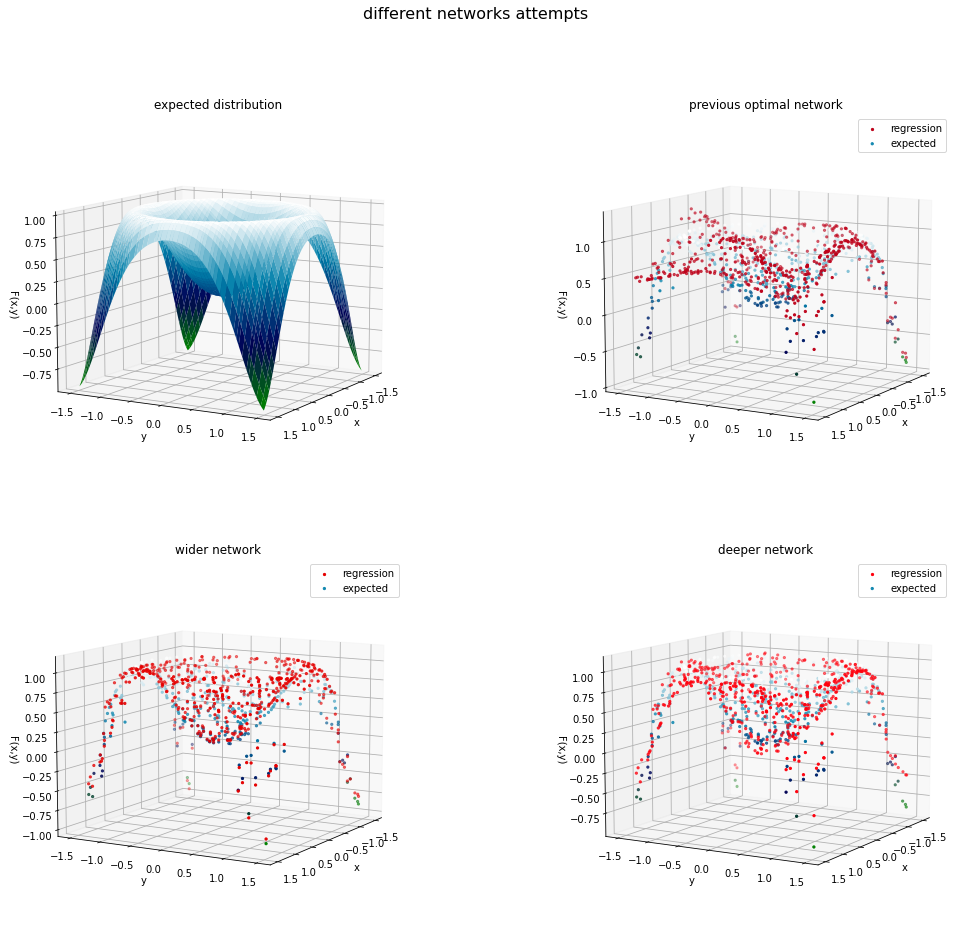

In [83]:
x_p = np.random.uniform(-1.5, 1.5, 500)
y_p = np.random.uniform(-1.5, 1.5, 500)
data_p = [x_p, y_p]
z_p = F(data_p[0], data_p[1])

data_p = np.transpose(data_p)
z_pred = model_s.predict(data_p)
z_pred2 = model_s2.predict(data_p)
z_pred3 = model_s3.predict(data_p)

data_p = np.transpose(data_p)

X = x_p
Y = y_p
X.sort()
Y.sort() 
X, Y = np.meshgrid(X,Y)
Z = F(X, Y)

fig = plt.figure(figsize=[18,15])
fig.suptitle('different networks attempts', fontsize = 16)

#expected
ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.set_title ('expected distribution')
ax.plot_surface(X, Y, Z,cmap="ocean")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('F(x,y)')
ax.view_init(10, 30)

# "normal" netowrk
ax = fig.add_subplot(2, 2, 2, projection='3d')
ax.set_title ('previous optimal network')
ax.scatter(data_p[0],data_p[1], z_pred, c="xkcd:scarlet", marker='.',label='regression')
ax.scatter(data_p[0],data_p[1], z_p, c=z_p, label = 'expected', marker='.',cmap="ocean")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('F(x,y)')
ax.legend(loc='best')
ax.view_init(10, 30)

# wider netowrk
ax = fig.add_subplot(2, 2, 3, projection='3d')
ax.set_title ('wider network')
ax.scatter(data_p[0],data_p[1], z_pred2, c="xkcd:red", marker='.',label='regression')
ax.scatter(data_p[0],data_p[1], z_p, c=z_p, label = 'expected', marker='.',cmap="ocean")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('F(x,y)')
ax.legend(loc='best')
ax.view_init(10, 30)

#deeper network
ax = fig.add_subplot(2, 2, 4, projection='3d')
ax.set_title ('deeper network')
ax.scatter(data_p[0],data_p[1], z_pred3, c="xkcd:bright red", marker='.', label='regression')
ax.scatter(data_p[0],data_p[1], z_p, c=z_p, label = 'expected', marker = '.',cmap="ocean")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('F(x,y)')
ax.legend(loc='best')
ax.view_init(10, 30)

Here we have an example of a more difficult costumer to fit, as it needs to receive two different kinds of input. Since the target is symmetric, it actually isn't as difficult as it may seem at first, one could concentrate on just one quadrant and the other would simply follow.

Here we compare the target function with the results from the previous optimal network. We notice the the overall shape seems quite similar, at least when considering the average values. Still, it evidently does not recognise the descent out of the local minimum. I thought therefore of two different ways to try and improve the network: first of all, forget all previous considerations on *log cosh* and return to *mse* as loss function, as the accuracy reached was much higher.
Secondly, I built two other networks based on the previous structure: for the first, I increased the ammount of neurons in each layer, at least doubling them: for the second, I added a new layer while increasing a little the neurons per layer. 

The results are quite similar to one another, but it seems to me that by increasing the number of neurons the network handles much better the more compelx structure of the target function. It might not be a simple problem of the number of parameters to fix for the predictions, as the deeper network actually has more, but also how they are organised. Since the works of the hidden layers are unknown, I assume the best way to find the optimal network architecture is a bit of trial and error and looking at previous results. One could built a genetic algorithm, or better still a neural network, to compare the possibilities and find a working solution…